In [2]:
from sklearn.datasets import fetch_openml

In [14]:
boston = fetch_openml(name='boston', version=1, as_frame=True)
x= boston.data
y = boston.target

print(X.head())


      CRIM    ZN  INDUS CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31    0  0.538  ...    1  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07    0  0.469  ...    2  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07    0  0.469  ...    2  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18    0  0.458  ...    3  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18    0  0.458  ...    3  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


In [5]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split


In [6]:
import sklearn.metrics as met
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
df=pd.DataFrame(x, columns=boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [19]:
df['price']=y

In [20]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [21]:
x_train.shape

(354, 13)

In [22]:
x_test.shape

(152, 13)

In [23]:
y_train.shape

(354,)

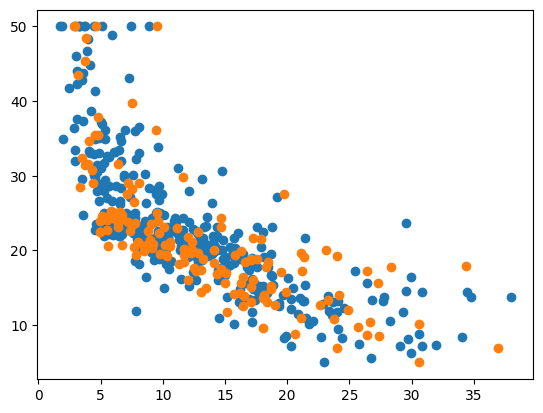

In [28]:
plt.scatter(x_train.iloc[:,12],y_train)
plt.scatter(x_test.iloc[:,12],y_test)

In [31]:
model=MLPRegressor(hidden_layer_sizes=(150,20), activation='logistic', solver='adam', random_state=1, max_iter=5000,verbose=True)
model.fit(x_train, y_train)

Iteration 1, loss = 304.12753092
Iteration 2, loss = 300.64363321
Iteration 3, loss = 297.26335939
Iteration 4, loss = 293.78760130
Iteration 5, loss = 290.49999071
Iteration 6, loss = 287.37623281
Iteration 7, loss = 284.38355732
Iteration 8, loss = 281.64650355
Iteration 9, loss = 279.15640324
Iteration 10, loss = 276.89152398
Iteration 11, loss = 274.78709971
Iteration 12, loss = 272.85464639
Iteration 13, loss = 271.11156200
Iteration 14, loss = 269.46720256
Iteration 15, loss = 267.96759226
Iteration 16, loss = 266.56572842
Iteration 17, loss = 265.26814860
Iteration 18, loss = 264.10780816
Iteration 19, loss = 263.03949613
Iteration 20, loss = 262.06345092
Iteration 21, loss = 261.12160319
Iteration 22, loss = 260.22706862
Iteration 23, loss = 259.37179102
Iteration 24, loss = 258.54096689
Iteration 25, loss = 257.72839806
Iteration 26, loss = 256.96161111
Iteration 27, loss = 256.19206453
Iteration 28, loss = 255.45338509
Iteration 29, loss = 254.71456262
Iteration 30, loss = 25

MLPRegressor(activation='logistic', hidden_layer_sizes=(150, 20), max_iter=5000,
             random_state=1, verbose=True)

In [34]:
yhat=model.predict(x.values)
yhat_train=model.predict(x_train.values)
yhat_test=model.predict(x_test.values)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'predicted_price')

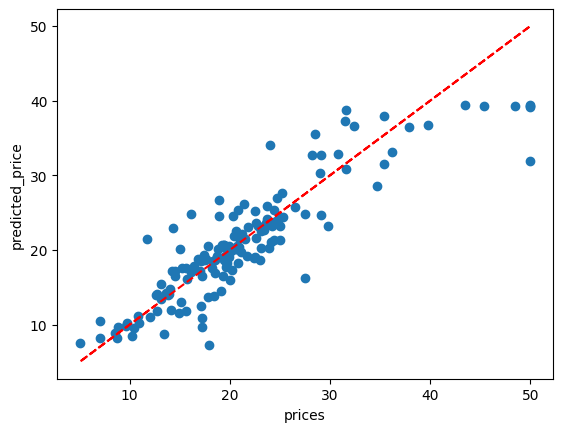

In [38]:
plt.scatter(y_test,yhat_test)
plt.plot(y_test,y_test,'r--')
plt.xlabel('prices')
plt.ylabel('predicted_price')

In [36]:
met.mean_squared_error(y_test,yhat_test)

16.145861533345432

In [40]:
model.score(x_train.values,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


0.9140080054203732

In [41]:
model.score(x_test.values,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


0.7833151151445631